Importing Models

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns 
import statsmodels.api as sm
%matplotlib inline

Reading Dataset

In [29]:
rfh= pd.read_csv("RedFin_House_data.csv", header=0)
rfh.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,"In accordance with local MLS rules, some MLS l...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MLS Listing,NaN,Single Family Residential,7551 Southamptonshire Way,New Kent,VA,23124.0,362000.0,2.0,2.0,...,Active,NaN,NaN,https://www.redfin.com/VA/New-Kent/7551-Southa...,CVRMLS,2403271,N,Y,37.511802,-77.075311
2,MLS Listing,NaN,Single Family Residential,8301 Bradbury Rd,Henrico,VA,23231.0,349500.0,4.0,2.0,...,Active,NaN,NaN,https://www.redfin.com/VA/Henrico/8301-Bradbur...,CVRMLS,2402608,N,Y,37.436497,-77.276419
3,MLS Listing,NaN,Single Family Residential,1430 Ascot Hill Ter,Midlothian,VA,23112.0,975000.0,6.0,4.5,...,Active,NaN,NaN,https://www.redfin.com/VA/Midlothian/1430-Asco...,CVRMLS,2401727,N,Y,37.479386,-77.721275
4,MLS Listing,NaN,Single Family Residential,8713 Glen Royal Dr,Chesterfield,VA,23832.0,615000.0,4.0,3.0,...,Active,NaN,NaN,https://www.redfin.com/VA/Chesterfield/8713-Gl...,CVRMLS,2402216,N,Y,37.377651,-77.712098


Adjusting Dataset to Qualifying Metrics

In [30]:
rfhc = rfh.drop(['PROPERTY TYPE','SALE TYPE', 'SOLD DATE','ADDRESS','STATUS','NEXT OPEN HOUSE START TIME','NEXT OPEN HOUSE END TIME','URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)','SOURCE','MLS#','FAVORITE','INTERESTED','STATE OR PROVINCE','LOCATION','HOA/MONTH','LATITUDE','LONGITUDE'], axis=1)
rhd = rfhc.drop(index=0)
rhd.head()

,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET
1,New Kent,23124.0,362000.0,2.0,2.0,1332.0,8232.0,2022.0,7.0,272.0
2,Henrico,23231.0,349500.0,4.0,2.0,1920.0,NaN,1950.0,18.0,182.0
3,Midlothian,23112.0,975000.0,6.0,4.5,3677.0,15089.0,2019.0,19.0,265.0
4,Chesterfield,23832.0,615000.0,4.0,3.0,2884.0,15015.0,2019.0,20.0,213.0
5,Richmond,23225.0,384950.0,3.0,1.5,1501.0,9313.0,1937.0,1.0,256.0


Converting CITY names into integers

In [31]:
cities = rhd['CITY'].unique()
cities

array(['New Kent', 'Henrico', 'Midlothian', 'Chesterfield', 'Richmond',
       'Glen Allen', 'North Chesterfield', 'Petersburg', 'Charles City',
       'Beaverdam', 'Ruther Glen', 'King William', 'Manakin Sabot',
       'Hopewell', 'Mechanicsville', 'Chester', 'Aylett', 'Prince George',
       'Moseley', 'Colonial Heights', 'Ashland', 'Burgess', 'Montpelier',
       'Powhatan', 'Hanover', 'Sandston', 'Quinton', 'Bumpass',
       'South Chesterfield', 'South Prince George', 'Dinwiddie',
       'Highland Springs', 'Spring Grove', 'St Stephens Church',
       'Doswell', 'North Prince George', 'Disputanta', 'North Dinwiddie',
       'Goochland'], dtype=object)

In [32]:
# Using Label encoder to convert to numbers
label_encoder = LabelEncoder()
rhd['CITY'] = label_encoder.fit_transform(rhd['CITY'])
rhd

,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET
1,24,23124.0,362000.0,2.0,2.0,1332.0,8232.0,2022.0,7.0,272.0
2,15,23231.0,349500.0,4.0,2.0,1920.0,NaN,1950.0,18.0,182.0
3,21,23112.0,975000.0,6.0,4.5,3677.0,15089.0,2019.0,19.0,265.0
4,7,23832.0,615000.0,4.0,3.0,2884.0,15015.0,2019.0,20.0,213.0
5,32,23225.0,384950.0,3.0,1.5,1501.0,9313.0,1937.0,1.0,256.0
...,...,...,...,...,...,...,...,...,...,...
346,14,23005.0,799950.0,4.0,3.5,3718.0,54711.0,2023.0,17.0,215.0
347,8,23834.0,355000.0,3.0,2.0,1712.0,14374.0,1962.0,17.0,207.0
348,15,23150.0,2200000.0,5.0,4.5,7347.0,1415700.0,2005.0,17.0,299.0
349,7,23803.0,624990.0,4.0,3.0,2985.0,NaN,2023.0,17.0,209.0


Removing NaN 

In [33]:
rhdd = rhd.dropna()
rhdd

,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET
1,24,23124.0,362000.0,2.0,2.0,1332.0,8232.0,2022.0,7.0,272.0
3,21,23112.0,975000.0,6.0,4.5,3677.0,15089.0,2019.0,19.0,265.0
4,7,23832.0,615000.0,4.0,3.0,2884.0,15015.0,2019.0,20.0,213.0
5,32,23225.0,384950.0,3.0,1.5,1501.0,9313.0,1937.0,1.0,256.0
6,12,23059.0,684000.0,4.0,3.0,3144.0,9583.0,2022.0,1.0,218.0
...,...,...,...,...,...,...,...,...,...,...
345,33,22546.0,600000.0,3.0,3.0,1776.0,48352.0,1984.0,17.0,338.0
346,14,23005.0,799950.0,4.0,3.5,3718.0,54711.0,2023.0,17.0,215.0
347,8,23834.0,355000.0,3.0,2.0,1712.0,14374.0,1962.0,17.0,207.0
348,15,23150.0,2200000.0,5.0,4.5,7347.0,1415700.0,2005.0,17.0,299.0


Using Linear Regression to include into model, and Adjusting Dataset

In [34]:
X= rhdd.drop('PRICE', axis=1)
y= rhdd['PRICE']
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Use Forward Feature Selection to pick a good model
show_steps = True 
# Start with no predictors
included = []
# Keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# Create a model object to hold the modeling parameters
model = LinearRegression()  # Create a model for Linear Regression
# Get the number of cases in the training data
n = X_train.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # List the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # For each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # Fit the model with the Training data
        X_subset = X_train[included + [new_column]]  # Select the relevant columns
        model.fit(X_subset, y_train)  # Fit the model; consider which predictors should be included
        # Calculate the score (R^2 for Regression)
        r2 = model.score(X_subset, y_train)  # Calculate the score
        # Number of predictors in this model
        k = len(included) + 1
        # Calculate the adjusted R^2
        adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))  # Calculate the Adjusted R^2

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # If model improves
        if adjusted_r2 > best['a_r2']:
            # Record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # Flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # If found a better model after testing all remaining features
    if changed:
        # Update control details (you need to decide how to proceed here)
        included.append(best['feature'])
    else:
        break  # Exit the loop if no improvement

# Final selected features
selected_features = included
print("Selected features:", selected_features)


(Step) Excluded = BEDS, YEAR BUILT, BATHS, CITY, $/SQUARE FEET, ZIP OR POSTAL CODE, DAYS ON MARKET, SQUARE FEET, LOT SIZE
(Step) Trying BEDS...
(Step) - Features = BEDS
(Step) - Adjusted R^2: This = 0.285; Best = 0.000
(Step) - New Best!   : Feature = BEDS; R^2 = 0.288; Adjusted R^2 = 0.285
(Step) Trying YEAR BUILT...
(Step) - Features = YEAR BUILT
(Step) - Adjusted R^2: This = 0.086; Best = 0.285
(Step) Trying BATHS...
(Step) - Features = BATHS
(Step) - Adjusted R^2: This = 0.551; Best = 0.285
(Step) - New Best!   : Feature = BATHS; R^2 = 0.553; Adjusted R^2 = 0.551
(Step) Trying CITY...
(Step) - Features = CITY
(Step) - Adjusted R^2: This = 0.004; Best = 0.551
(Step) Trying $/SQUARE FEET...
(Step) - Features = $/SQUARE FEET
(Step) - Adjusted R^2: This = 0.270; Best = 0.551
(Step) Trying ZIP OR POSTAL CODE...
(Step) - Features = ZIP OR POSTAL CODE
(Step) - Adjusted R^2: This = 0.018; Best = 0.551
(Step) Trying DAYS ON MARKET...
(Step) - Features = DAYS ON MARKET
(Step) - Adjusted R^2

In [36]:
rhdn = rhdd.drop(['DAYS ON MARKET','LOT SIZE'], axis=1)
rhdn

,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,YEAR BUILT,$/SQUARE FEET
1,24,23124.0,362000.0,2.0,2.0,1332.0,2022.0,272.0
3,21,23112.0,975000.0,6.0,4.5,3677.0,2019.0,265.0
4,7,23832.0,615000.0,4.0,3.0,2884.0,2019.0,213.0
5,32,23225.0,384950.0,3.0,1.5,1501.0,1937.0,256.0
6,12,23059.0,684000.0,4.0,3.0,3144.0,2022.0,218.0
...,...,...,...,...,...,...,...,...
345,33,22546.0,600000.0,3.0,3.0,1776.0,1984.0,338.0
346,14,23005.0,799950.0,4.0,3.5,3718.0,2023.0,215.0
347,8,23834.0,355000.0,3.0,2.0,1712.0,1962.0,207.0
348,15,23150.0,2200000.0,5.0,4.5,7347.0,2005.0,299.0


Correlation Matrix: Find best Identifiers for a Possible trend

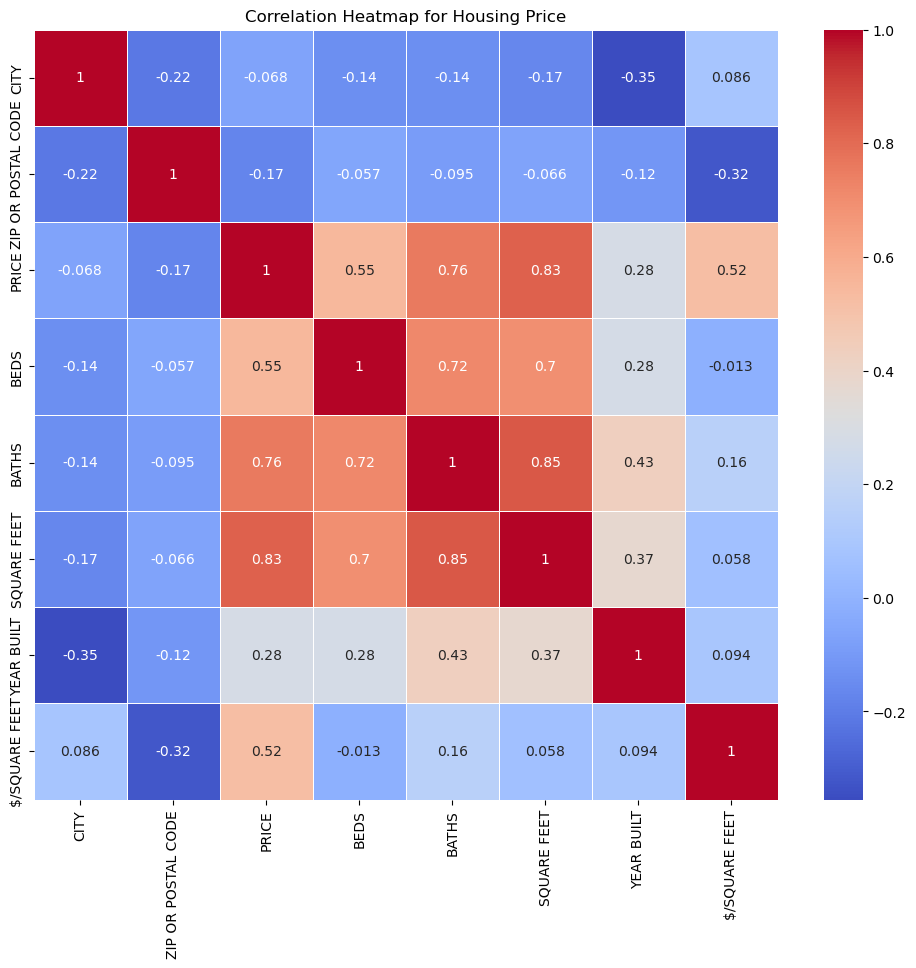

In [37]:
# Create a correlation matrix
correlation_matrix = rhdn.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Housing Price')
plt.show()

LOGISTIC REGRESSION:
We are going to look at the Classification Report, Confusion Matrix, and Accuracy

Confusion Matrix:
 [[40  1]
 [ 2 18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        41
           1       0.95      0.90      0.92        20

    accuracy                           0.95        61
   macro avg       0.95      0.94      0.94        61
weighted avg       0.95      0.95      0.95        61

Logistic Regression Accuracy: 0.97


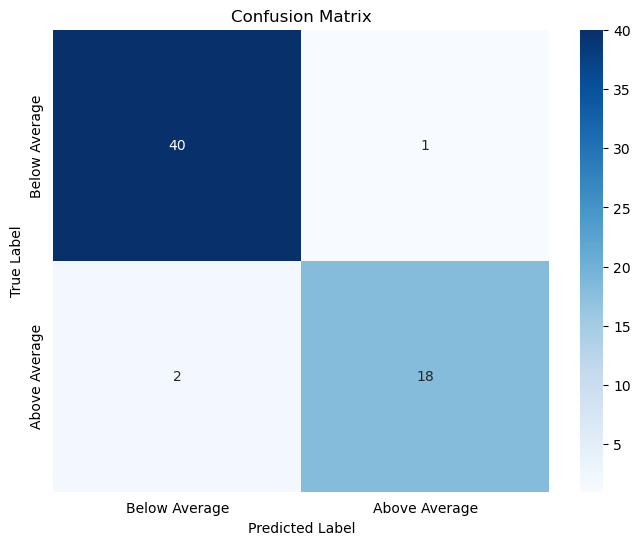

In [48]:
from scipy.stats.mstats import winsorize

# Winsorize the 'PRICE' variable to handle outliers
rhdd.loc[:, 'PRICE'] = winsorize(rhdd['PRICE'], limits=[0.0001, 0.0001])

# Compute average price
average_price = rhdd['PRICE'].mean()

# Create binary target variable 'Above_Average' based on whether price is above average
rhdd.loc[:, 'Above_Average'] = (rhdd['PRICE'] > average_price).astype(int)

# Define features (X) and target variable (y)
X = rhdd.drop(['PRICE', 'Above_Average'], axis=1)
y = rhdd['Above_Average']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, train_predictions)

# Make predictions on the test set
y_pred_labels = model.predict(X_test)
predicted_probabilities = model.predict_proba(X_test)
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Generate classification report
classification_report_str = classification_report(y_test, y_pred_labels)

# Print results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report_str)
print(f"Logistic Regression Accuracy: {train_accuracy:.2f}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Below Average', 'Above Average'])  # Relabel x-axis ticks
plt.yticks(ticks=[0.5, 1.5], labels=['Below Average', 'Above Average'])  # Relabel y-axis ticks
plt.gca().xaxis.set_ticks_position('none')  # Remove x-axis ticks
plt.gca().yaxis.set_ticks_position('none')  # Remove y-axis ticks
plt.show()

In [49]:
# Get indices of False Positives (FP)
fp_indices = np.where((y_test == 0) & (y_pred_labels== 1))[0]

# Get the corresponding rows from the original dataset
false_positive_houses = X_test.iloc[fp_indices]

# Display false positive houses
print("False Positive Houses:")
print(false_positive_houses)

False Positive Houses:
     CITY  ZIP OR POSTAL CODE  BEDS  BATHS  SQUARE FEET  LOT SIZE  YEAR BUILT  \
323    28             23805.0   3.0    2.5       4061.0   25264.0      1928.0   

     DAYS ON MARKET  $/SQUARE FEET  
323            14.0           65.0  


In [50]:
FP = sum((y_test == 0) & (y_pred_labels == 1))
FN = sum((y_test == 1) & (y_pred_labels == 0))

# Calculate classification error
classification_error = (FP + FN) / float(len(y_test))

# Print the classification error
print("Classification Error (Misclassification Rate):", classification_error)

Classification Error (Misclassification Rate): 0.04918032786885246


In [51]:
TP = sum((y_test == 1) & (y_pred_labels == 1))
FN = sum((y_test == 1) & (y_pred_labels == 0))

# Calculate sensitivity (True Positive Rate or Recall)
sensitivity = TP / float(FN + TP)

# Print the sensitivity
print("Sensitivity (True Positive Rate or Recall):", sensitivity)

Sensitivity (True Positive Rate or Recall): 0.9


In [52]:
TN = sum((y_test == 0) & (y_pred_labels == 0))
FP = sum((y_test == 0) & (y_pred_labels == 1))

# Calculate specificity
specificity = TN / float(TN + FP)

# Print the specificity
print("Specificity:", specificity)

Specificity: 0.975609756097561


In [53]:
FP = sum((y_test == 0) & (y_pred_labels == 1))
TN = sum((y_test == 0) & (y_pred_labels == 0))

# Calculate False Positive Rate
false_positive_rate = FP / float(TN + FP)

# Print the False Positive Rate
print("False Positive Rate:", false_positive_rate)

False Positive Rate: 0.024390243902439025


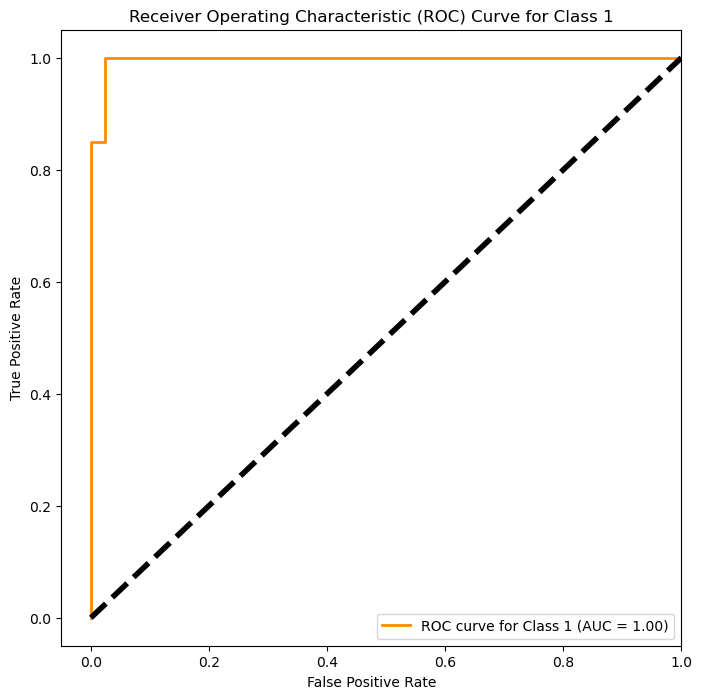

AUC for Class 1: 0.9963


In [54]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities[:, 1])

# Calculate Area Under the Curve (AUC) for Class 1
roc_auc_class_1 = auc(fpr, tpr)

# Plot ROC curve for Class 1
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve for Class 1 (AUC = {roc_auc_class_1:.2f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)  # Diagonal line
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Class 1')
plt.legend(loc='lower right')
plt.show()

# Display AUC for Class 1
print(f'AUC for Class 1: {roc_auc_class_1:.4f}')

In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize SVC model with linear kernel
svm_classifier = SVC(kernel='linear')

# Perform cross-validation
cv_scores = cross_val_score(svm_classifier, X_scaled, y, cv=5, scoring='roc_auc')

# Fit the model on the entire dataset
svm_classifier.fit(X_scaled, y)

# Make predictions
y_pred = svm_classifier.predict(X_scaled)

# Evaluate performance
print("Cross-Validation AUC-ROC Scores:", cv_scores)
print("Mean AUC-ROC Score:", cv_scores.mean())
print("Classification Report:")
print(classification_report(y, y_pred))
print("Overall AUC-ROC Score:", roc_auc_score(y, y_pred))

Cross-Validation AUC-ROC Scores: [0.98414634 0.99146341 0.99390244 0.99512195 0.99875   ]
Mean AUC-ROC Score: 0.9926768292682928
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       204
           1       0.98      0.96      0.97       100

    accuracy                           0.98       304
   macro avg       0.98      0.98      0.98       304
weighted avg       0.98      0.98      0.98       304

Overall AUC-ROC Score: 0.9750980392156864


SVC Accuracy: 0.9180327868852459


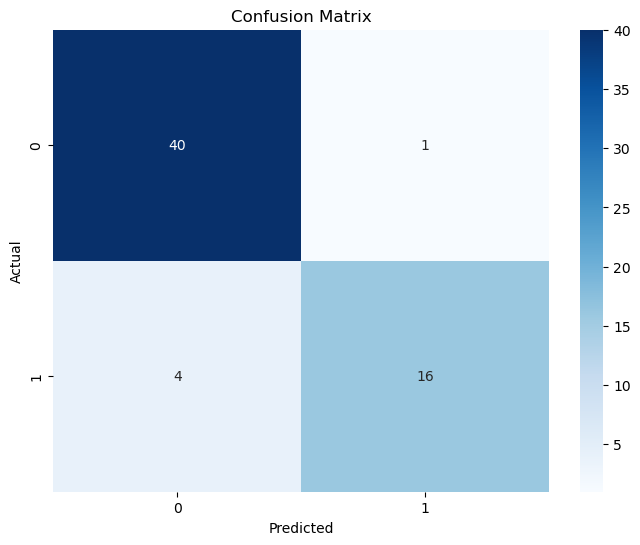

In [56]:
# Winsorize the 'PRICE' variable to handle outliers
rhdd.loc[:, 'PRICE'] = winsorize(rhdd['PRICE'], limits=[0.01, 0.01])

# Compute average price
average_price = rhdd['PRICE'].mean()

# Create binary target variable 'Above_Average' based on whether price is above average
rhdd.loc[:, 'Above_Average'] = (rhdd['PRICE'] > average_price).astype(int)

# Define features (X) and target variable (y)
X = rhdd.drop(['PRICE', 'Above_Average'], axis=1)
y = rhdd['Above_Average']

# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='linear', C=1.0)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("SVC Accuracy:", accuracy)

conf_matrixSVC = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixSVC, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Naive Bayes Accuracy: 0.9016393442622951


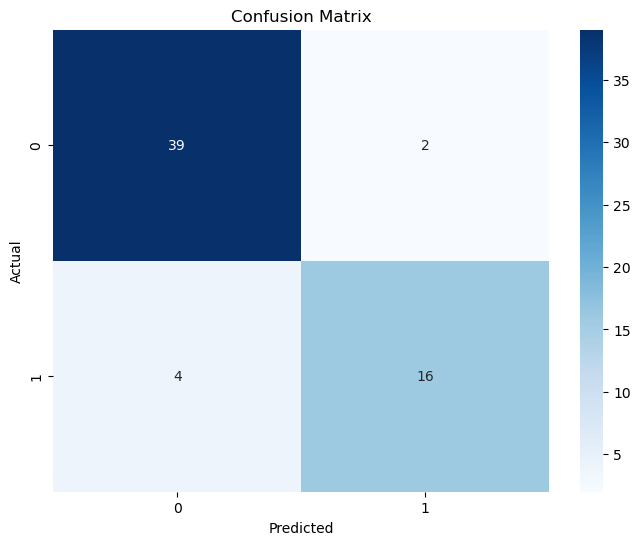

In [57]:
from sklearn.naive_bayes import GaussianNB

# Winsorize the 'PRICE' variable to handle outliers
rhdd.loc[:, 'PRICE'] = winsorize(rhdd['PRICE'], limits=[0.01, 0.01])

# Compute average price
average_price = rhdd['PRICE'].mean()

# Create binary target variable 'Above_Average' based on whether price is above average
rhdd.loc[:, 'Above_Average'] = (rhdd['PRICE'] > average_price).astype(int)

# Define features (X) and target variable (y)
X = rhdd.drop(['PRICE', 'Above_Average'], axis=1)
y = rhdd['Above_Average']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Naive Bayes classifier (Gaussian Naive Bayes for continuous features)
nb_classifier = GaussianNB()

# Train the classifier on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)

conf_matrixNB = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrixNB, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [58]:
row = rfh.iloc[323]
print(row)

SALE TYPE                                                                                                                            MLS Listing
SOLD DATE                                                                                                                                    NaN
PROPERTY TYPE                                                                                                          Single Family Residential
ADDRESS                                                                                                                       1888 S Sycamore St
CITY                                                                                                                                  Petersburg
STATE OR PROVINCE                                                                                                                             VA
ZIP OR POSTAL CODE                                                                                                                

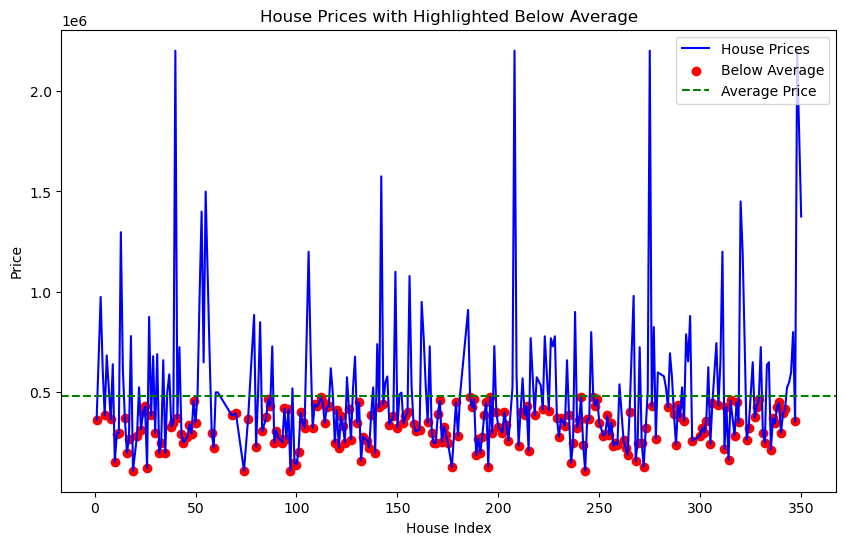

The average price is: 479668.2335526316


In [62]:
average_price = rhdd['PRICE'].mean()

# Plot all houses
plt.figure(figsize=(10, 6))
plt.plot(rhdd.index, rhdd['PRICE'], color='blue', label='House Prices')

# Highlight houses below the average price
below_average = rhdd[rhdd['PRICE'] < average_price]
plt.scatter(below_average.index, below_average['PRICE'], color='red', label='Below Average')

# Plot average price line
plt.axhline(y=average_price, color='green', linestyle='--', label='Average Price')

# Set labels and title
plt.xlabel('House Index')
plt.ylabel('Price')
plt.title('House Prices with Highlighted Below Average')
plt.legend()

# Show plot
plt.show()

# Print average price
print(f"The average price is: {average_price}")